Week 1 – Day 6: Evaluation Metrics Beyond Accuracy

Objective of the day
Understand why accuracy isn’t enough and learn new metrics: precision, recall, F1-score, and ROC-AUC. By the end, you’ll be able to judge model performance more deeply.

Accuracy: 0.7552447552447552
Confusion matrix:
 [[68 19]
 [16 40]]
Model coefficient.
[[ 2.53047810e+00 -1.24068794e+00 -4.24723266e-02  2.27399583e-04]]
[2.61171493]

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143


ROC curve + AUC


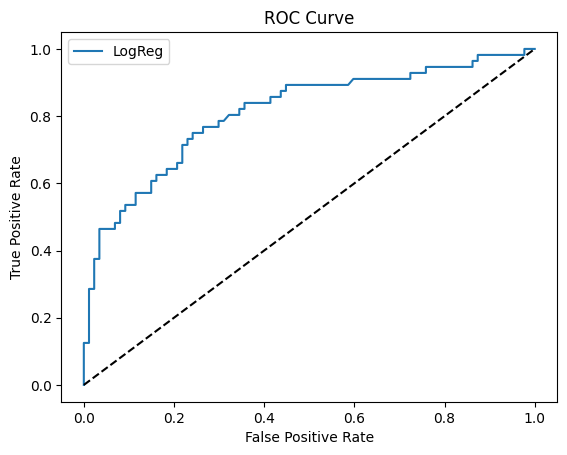

ROC AUC: 0.8109605911330049


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# Convert categorical column 'sex' to numbers
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Drop rows with missing age
df = df.dropna(subset=["age"])

X = df[["sex", "pclass", "age", "fare"]]
y = df["survived"]

#Spliinto train/test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train Model

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

#Evaluate

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("Model coefficient.")
print(model.coef_)
print(model.intercept_)

print()
print(classification_report(y_test, y_pred))

#ROC curve + AUC
print()

print("ROC curve + AUC")

y_pred_proba = model.predict_proba(X_test)[:,1]  # probability of survival
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="LogReg")
plt.plot([0,1],[0,1],"k--") # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))



Precision = of those predicted positive, how many were actually positive.

Recall = of all actual positives, how many did we catch.

F1 = harmonic mean of precision & recall.

ROC curve

ROC curve = Receiver Operating Characteristic.

It plots True Positive Rate (TPR) vs False Positive Rate (FPR) for different thresholds.

🔎 What does threshold mean?

Normally, the model says:

if probability ≥ 0.5 → predict survived

if probability < 0.5 → predict died

But we can slide that cutoff (0.4, 0.6, etc.) and see how performance changes.

Lower threshold → catch more survivors (higher TPR) but also more false alarms (higher FPR).

Higher threshold → fewer false alarms, but you miss survivors.

The ROC curve shows this tradeoff.

🔎 Putting it together in the curve

Each point on the ROC curve = a (FPR, TPR) pair for a certain threshold.

If you lower the threshold (say 0.3):

The model says "survived" more often → TPR goes up (catch more survivors) but FPR also goes up (more false alarms).

If you raise the threshold (say 0.7):

The model is stricter → fewer false alarms (low FPR), but you miss more survivors (low TPR).

AUC = Area Under the Curve.

Value between 0 and 1.

0.5 = random guessing (bad).

1.0 = perfect model.

In practice:

0.7–0.8 = decent

0.8–0.9 = good

0.9+ = excellent

🌟 Mini-Challenge

Imagine you’re designing a real survival alert system. Which metric would matter more: precision or recall?

Precision → avoid false alarms (predict survival only when you’re sure).

Recall → catch as many true survivors as possible, even if it means more false alarms.

Answer in plain words which one you’d prioritize and why.

I dont understand very much what do you eman by a 'real survival alert system' but I interpret as a system that raises an alarm to save lives. In this case our objective is to save as many lives as posible so we dont care about false alarms we just care about saving as many people. Therofre I would prioritize recall.